In [10]:
import sys
sys.path.append('..')
import lasp.grayscale 
from lasp.geometry import *

In [11]:
import matplotlib.pyplot
# CMAP = None
CMAP = 'gray'
import numpy

In [12]:
# def make_square(
#     img: numpy.ndarray, 
#     p1: numpy.ndarray,
#     p2: numpy.ndarray,
#     value: float | int
# ) -> numpy.ndarray :
#     # img[p1[0]:p1[1], p2[0]:p2[1]] = value
#     img[p1[0]:p2[1], p1[0]:p2[1]] = value
#     return img


# def is_inside_circle(
#     center: numpy.ndarray,
#     radius: numpy.ndarray,
#     point: numpy.ndarray
# ) -> bool:
#     norm2 = numpy.sqrt(((center-point)**2).sum(axis=0))
#     return norm2 < radius
    

# def make_partial_circle(
#     img: numpy.ndarray, 
#     center: numpy.ndarray,
#     radius_min: int,
#     radius_max: int,
#     value: float | int | numpy.ndarray
# ) -> numpy.ndarray :
    
#     n, m = img.shape

#     # c_row, c_col = center

#     # row_min, col_min = c_row-radius, c_col-radius
#     # row_max, col_max = c_row+radius, c_col+radius

#     # start_i = max(row_min, 0)
#     # start_j = max(col_min, 0)
#     # end_i = max(row_max, 0)
#     # end_j = max(col_max, 0)

#     for i in range(0, n):
#         for j in range(0, m):
#             if (
#                 not(is_inside_circle(center, radius_min, numpy.array([i, j])))
#                 and is_inside_circle(center, radius_max, numpy.array([i, j]))
#             ):
#                 img[i, j] = value
    
#     return img


# def make_circle(
#     img: numpy.ndarray, 
#     center: numpy.ndarray,
#     radius: numpy.ndarray,
#     value: float | int | numpy.ndarray
# ) -> numpy.ndarray :
    
#     n, m = img.shape

#     c_row, c_col = center

#     # row_min, col_min = c_row-radius, c_col-radius
#     # row_max, col_max = c_row+radius, c_col+radius

#     # start_i = max(row_min, 0)
#     # start_j = max(col_min, 0)
#     # end_i = max(row_max, 0)
#     # end_j = max(col_max, 0)

#     for i in range(0, n):
#         for j in range(0, m):
#             if is_inside_circle(center, radius, numpy.array([i, j])):
#                 img[i, j] = value
    
#     return img


# def is_inside_triangle(
#     p1: numpy.ndarray, 
#     p2: numpy.ndarray, 
#     p3: numpy.ndarray,
#     point : numpy.ndarray
# ) -> bool:
    
#     def triangle_area(p1: numpy.ndarray, p2: numpy.ndarray, p3: numpy.ndarray) -> float:

#         x1, y1 = p1
#         x2, y2 = p2
#         x3, y3 = p3

#         a = x1*(y2-y3)
#         b = x2*(y3-y1)
#         c = x3*(y1-y2)

#         return numpy.abs((a+b+c) / 2)
    
#     area_0 = triangle_area(p1, p2, p3)
#     area_1 = triangle_area(point, p2, p3)
#     area_2 = triangle_area(p1, point, p3)
#     area_3 = triangle_area(p1, p2, point)

#     return area_0 == (area_1 + area_2 + area_3)
    


# def make_triangle(
#     img: numpy.ndarray, 
#     p1: numpy.ndarray,
#     p2: numpy.ndarray,
#     p3: numpy.ndarray,
#     value: float | int | numpy.ndarray
# ) -> numpy.ndarray :
        
#     n, m = img.shape

#     ps = numpy.array([p1, p2, p3])

#     row_min, col_min = numpy.min(ps, axis=0)
#     row_max, col_max = numpy.max(ps, axis=0)

#     start_i = max(row_min, 0)
#     start_j = max(col_min, 0)
#     end_i = min(row_max, n)
#     end_j = min(col_max, m)

#     for i in range(start_i, end_i):
#         for j in range(start_j, end_j):
#             if is_inside_triangle(p1, p2, p3, numpy.array([i, j])):
#                 img[i, j] = value
    
#     return img


# def make_star(
#     img: numpy.ndarray, 
#     p1: numpy.ndarray,
#     p2: numpy.ndarray,
#     value: float | int | numpy.ndarray
# ) -> numpy.ndarray :
        
#     n, m = img.shape

#     ps = numpy.array([p1, p2])

#     row_min, col_min = numpy.min(ps, axis=0)
#     row_max, col_max = numpy.max(ps, axis=0)

#     start_i = max(row_min, 0)
#     start_j = max(col_min, 0)
#     end_i = min(row_max, n)
#     end_j = min(col_max, m)

#     step_i = end_i - start_i
#     step_j = end_j - start_j

#     t1_p1 = numpy.array(
#         [
#             start_i+int(0.25*step_i),
#             start_j
#         ]
#     )

#     t1_p2 = numpy.array(
#         [
#             start_i+int(0.25*step_i),
#             end_j
#         ]
#     )

#     t1_p3 = numpy.array(
#         [
#             end_i,
#             start_j+int(0.5*step_j)
#         ]
#     )

#     t2_p1 = numpy.array(
#         [
#             start_i+int(0.75*step_i),
#             start_j
#         ]
#     )

#     t2_p2 = numpy.array(
#         [
#             start_i+int(0.75*step_i),
#             end_j
#         ]
#     )

#     t2_p3 = numpy.array(
#         [
#             start_i,
#             start_j+int(0.5*step_j)
#         ]
#     )

#     for i in range(start_i, end_i):
#         for j in range(start_j, end_j):
#             if (
#                 is_inside_triangle(t1_p1, t1_p2, t1_p3, numpy.array([i, j]))
#                 or is_inside_triangle(t2_p1, t2_p2, t2_p3, numpy.array([i, j]))
#             ):
#                 img[i, j] = value
    
#     return img
    


# # def is_inside_parallelogram(
# #     p1: numpy.ndarray, 
# #     p2: numpy.ndarray, 
# #     p3: numpy.ndarray,
# #     point : numpy.ndarray
# # ) -> bool:
    
# #     def parallelogram_area(
# #         p1: numpy.ndarray, 
# #         p2: numpy.ndarray, 
# #         p3: numpy.ndarray
# #     ) -> float:

# #         x1, y1 = p1
# #         x2, y2 = p2
# #         x3, y3 = p3

# #         a = x1*(y2-y3)
# #         b = x2*(y3-y1)
# #         c = x3*(y1-y2)
    
# #         return numpy.abs(a+b+c)
    
# #     def triangle_area(
# #         p1: numpy.ndarray, 
# #         p2: numpy.ndarray, 
# #         p3: numpy.ndarray
# #     ) -> float:

# #         x1, y1 = p1
# #         x2, y2 = p2
# #         x3, y3 = p3

# #         a = x1*(y2-y3)
# #         b = x2*(y3-y1)
# #         c = x3*(y1-y2)
    
# #         return numpy.abs((a+b+c) / 2)
    
# #     area_0 = parallelogram_area(p1, p2, p3)
# #     area_1 = triangle_area(point, p2, p3)
# #     area_2 = triangle_area(p1, point, p3)
# #     area_3 = triangle_area(p1, p2, point)


# #     return area_0 == (area_1 + area_2 + area_3)



In [13]:
BACKGROUNG = 1.0
GEOMETRY = 0.5

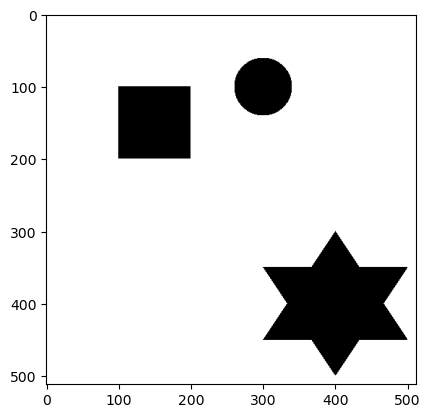

In [14]:
img = numpy.full(shape=(512, 512), fill_value=BACKGROUNG, dtype=numpy.float_)

img = make_square(
    img = img,
    p1 = numpy.array([100, 100]),
    p2 = numpy.array([200, 200]), 
    value=GEOMETRY
)
img = make_circle(img, numpy.array([100, 300]), 40, value=GEOMETRY)
img = make_star(img, numpy.array([300, 300]), numpy.array([300, 300]) + 200, value=GEOMETRY)
_ = matplotlib.pyplot.imshow(img, cmap=CMAP)

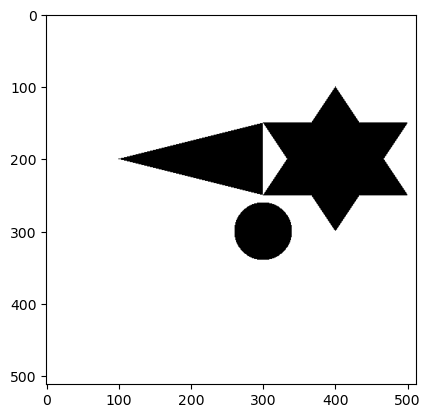

In [15]:
img = numpy.full(shape=(512, 512), fill_value=BACKGROUNG, dtype=numpy.float_)
xi = numpy.array([100, 100])
yi = xi + 100
img = make_triangle(
    img, 
    p1 = numpy.array([200, 100]),
    p2 = numpy.array([250, 300]),
    p3 = numpy.array([150, 300]), 
    value=GEOMETRY
)
img = make_circle(img, numpy.array([300, 300]), 40, value=GEOMETRY)
img = make_star(img, numpy.array([100, 300]), numpy.array([100, 300]) + 200, value=GEOMETRY)
_ = matplotlib.pyplot.imshow(img, cmap=CMAP)


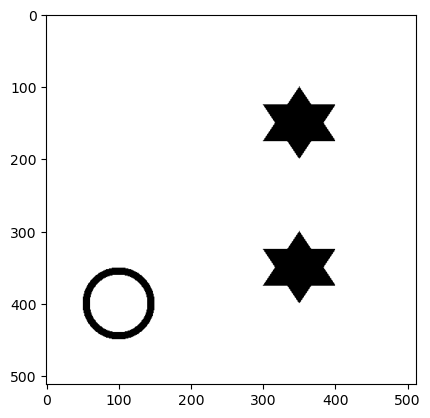

In [16]:
img = numpy.full(shape=(512, 512), fill_value=BACKGROUNG, dtype=numpy.float_)
xi = numpy.array([100, 100])
yi = xi + 100

img = make_triangle(
    img, 
    p1 = numpy.array([100, 10]),
    p2 = numpy.array([100, 100]),
    p3 = numpy.array([150, 300]), 
    value=1.0
)

img = make_partial_circle(img, numpy.array([400, 100]), 40, 50, value=GEOMETRY)
img = make_star(img, numpy.array([100, 300]), numpy.array([100, 300]) + 100, value=GEOMETRY)

img = make_star(img, numpy.array([300, 300]), numpy.array([300, 300]) + 100, value=GEOMETRY)


_ = matplotlib.pyplot.imshow(img, cmap=CMAP)

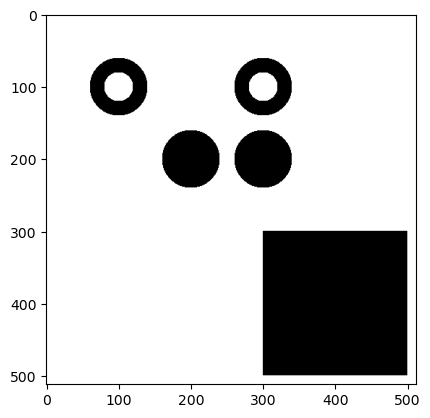

In [17]:
img = numpy.full(shape=(512, 512), fill_value=BACKGROUNG, dtype=numpy.float_)

img = make_partial_circle(
    img = img,
    center = numpy.array([100, 100]),
    radius_min = 20, 
    radius_max = 40, 
    value=GEOMETRY
)

img = make_circle(
    img = img,
    center = numpy.array([200, 200]),
    radius = 40, 
    value=GEOMETRY
)


img = make_partial_circle(
    img = img,
    center = numpy.array([100, 300]),
    radius_min = 20, 
    radius_max = 40, 
    value=GEOMETRY
)

img = make_circle(
    img = img,
    center = numpy.array([200, 300]),
    radius = 40, 
    value=GEOMETRY
)

img = make_square(
    img = img,
    p1 = numpy.array([300, 400]),
    p2 = numpy.array([400, 500]),
    value=GEOMETRY
)

# img = make_partial_circle(
#     img = img,
#     center = numpy.array([200, 200]),
#     radius_min = 20, 
#     radius_max = 40, 
#     value=1.0
# )


# img = make_partial_circle(img, numpy.array([400, 100]), 40, 50, value=1.0)
# img = make_star(img, numpy.array([100, 300]), numpy.array([100, 300]) + 100, value=1.0)

# img = make_star(img, numpy.array([300, 300]), numpy.array([300, 300]) + 100, value=1.0)


_ = matplotlib.pyplot.imshow(img, cmap=CMAP)